
# Project: Investigate a Dataset (tmdb-Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This data set contains information for __10,866__ movies collected from The Movie Database(TMDb), including user ratings and revenue between 1960 and 2015.**

Fact about Dataset :
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
- There are some odd characters in the ‘cast’ column . 
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Questions 
1. Which year do the movies get the most revenue ?
2. Does There is a relation between budget and revenue? and whats is the strength of it? 
3. Did the inflation impact on relation between budget and revenue ? (inflation on question 2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from collections import Counter
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load data, check for cleanliness, and then trim and clean the dataset for analysis .


In [3]:
df = pd.read_csv("tmdb-movies.csv") # load Dataset 
print("TMdb {0} Rows and {1} Columns ".format(df.shape[0],df.shape[1])) 
df.head()# First look at the dataset

TMdb 10866 Rows and 21 Columns 


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check The DataTypes Firs and Null Values 

### OverView About the Dataset.

In [4]:
df.info() # view the Data types and number of data in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe() #some statistical overview of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


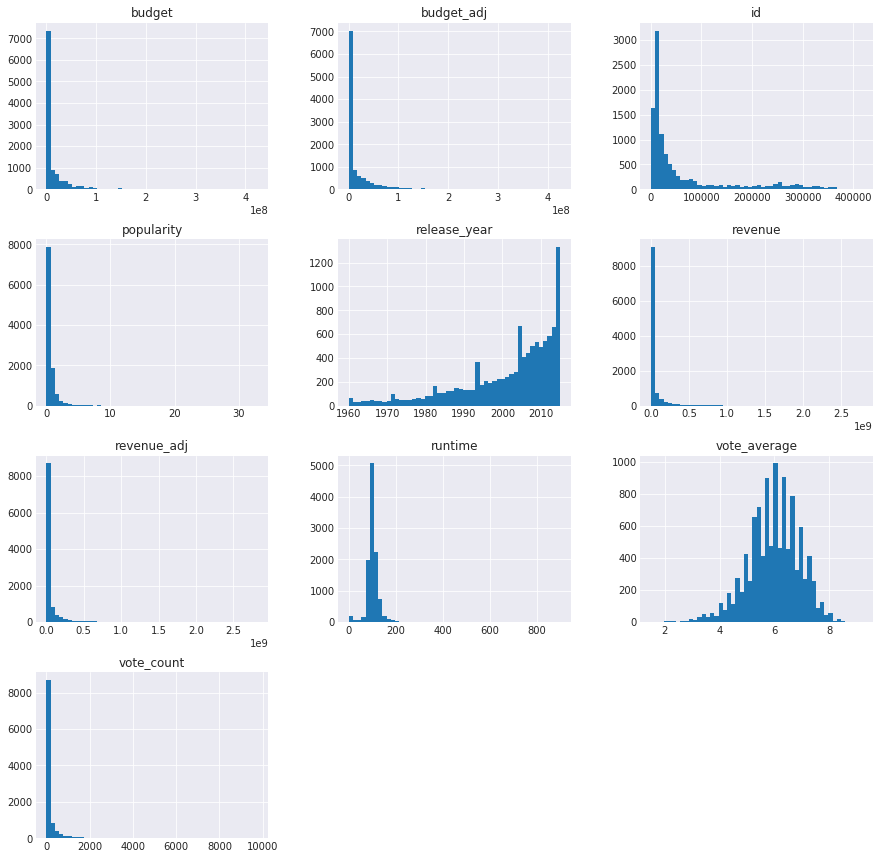

In [6]:
df.hist(bins=50 , figsize=(15,15)); # some figure on Dataset

In [7]:
# Drop some columns I don't need it in my questions to make the dataset more specific to my needs
df.drop(["id","imdb_id","homepage","tagline","keywords","overview","genres","production_companies","budget","revenue","vote_count"],axis=1,inplace=True)

In [8]:
df.head() # Check the changes 

,popularity,original_title,cast,director,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


- Check duplicate ,on null

In [9]:
print ("Duplicate Rows :" ,df.duplicated().sum()) # number of dublicated rows 
df.isna().sum() # number of cells in each column that have null values

Duplicate Rows : 1


popularity         0
original_title     0
cast              76
director          44
runtime            0
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

- There is one Duplicate row so I can drop it easily.

In [10]:
df.drop_duplicates(inplace=True) # drop the row that was duplicated 

 **Bcause Cast and Directors are important in my questions and I can't fix it ,I Must Drop it from Dataset.**

In [11]:
df.dropna(inplace=True) # Drop rows that contain null values 

In [12]:
# Final Check duplicates and nulls 
print ("Duplicate Rows :" ,df.duplicated().sum())
df.isna().sum() 


Duplicate Rows : 0


popularity        0
original_title    0
cast              0
director          0
runtime           0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

- #### use revenue_adj and budget_adj to be fair about the inflation problem,
Rename the column to clearly view, and change the data type to be an int datatype.

In [13]:
# Rename 
df.rename(columns={"budget_adj":"budget","revenue_adj":"revenue"} , inplace=True) # renaming columns 

In [41]:
df = df.astype({"budget": int, "revenue": int}) #Change DT to int 

- The Revenue and Budget columns have a lot of 0 values as shown in the above histograms .

In [16]:
# How many 0 values in Revenue column and budget column
print (df.query("revenue == 0").shape )
print (df.query("budget == 0").shape )

(5908, 10)
(5599, 10)


- The Revenue and Budget columns have a lot of 0 values (5908 Movies, 5599 Movies), I will use the mean of revenue and budjet to fill 0 values because In a normal situation, the movie cat has a (0) Revenue or (0) Budget. 

In [17]:
df.loc[df['revenue'] == 0,'revenue'] = df['revenue'].mean() # fill all 0 revenue withe mean 

df.loc[df['budget'] == 0 , 'budget'] = df['budget'].mean() # fill all 0 buget withe mean 

In [18]:
# Final Check on 0 values 
print("Revenue = 0 -> " , df.query('revenue == 0').count().revenue)

print("Budget  = 0 -> " ,df.query('budget == 0').count().budget)

Revenue = 0 ->  0
Budget  = 0 ->  0


<a id='eda'></a>
## Exploratory Data Analysis
in this part, I will be answering the questions above. 


###  Question 1 :
 > Which year do the movies get the most revenue ?


In this Question, I try to answer the most question I heard from movie viewers by asking which year has the most revenue in **all time**? 

I was used the proportion (total sum revenue / number of movies per year) to find the years that have incredible revenue.

 > **Suppose that the currency is dollar ($)**

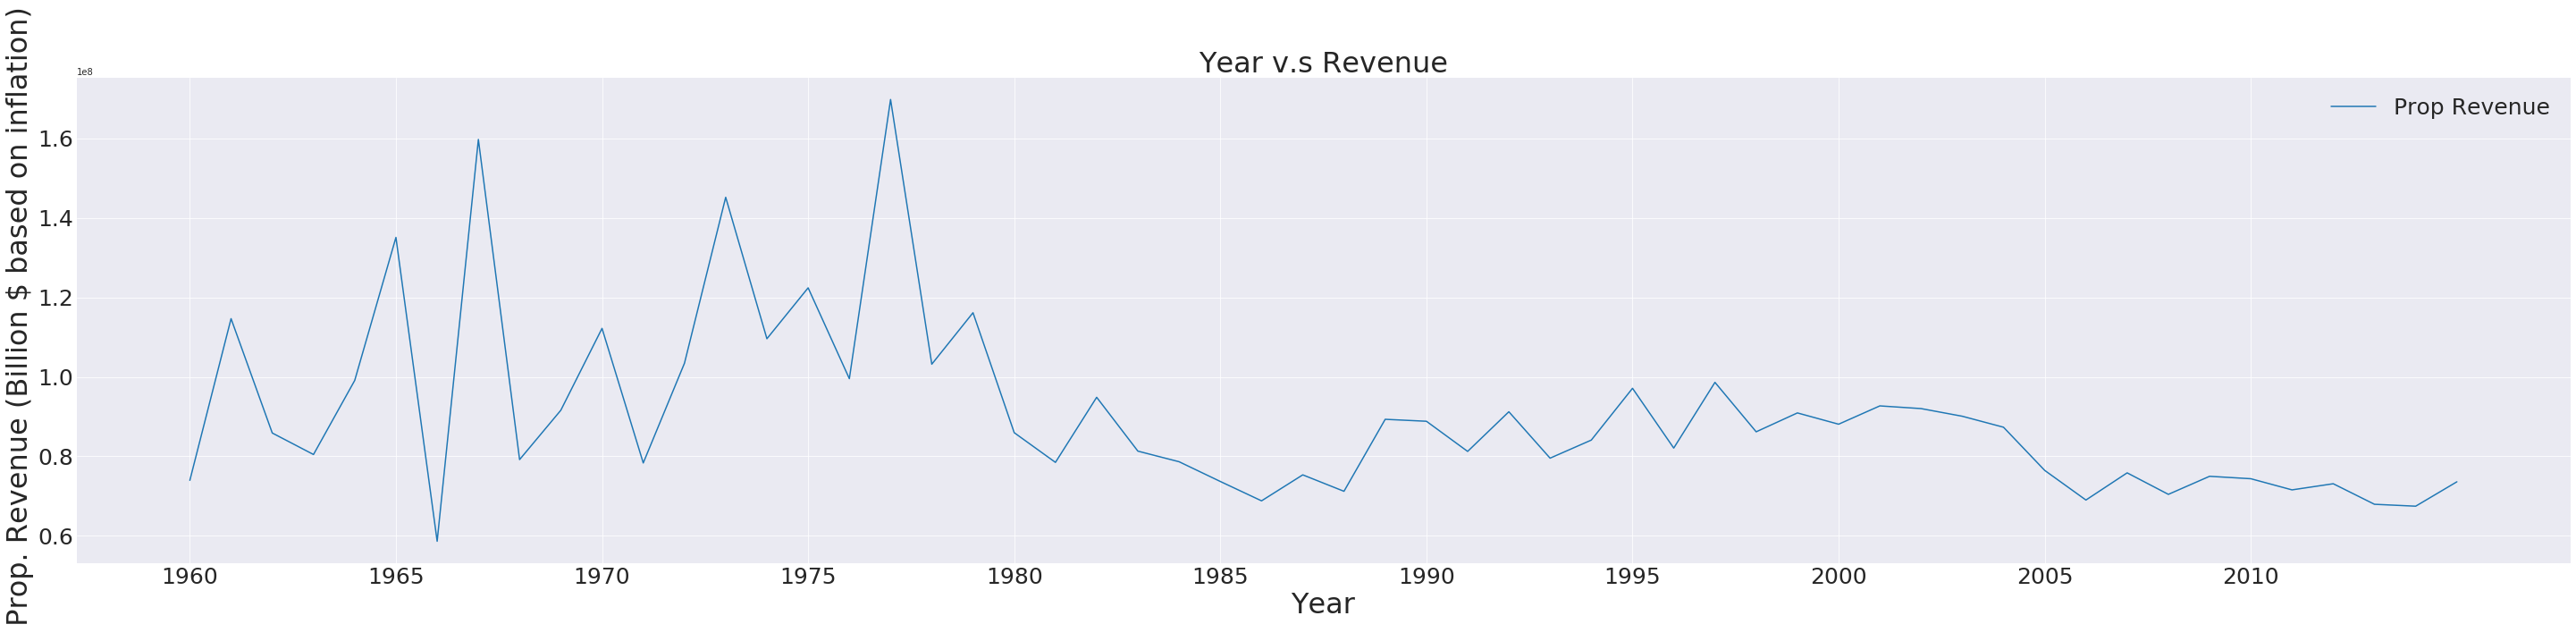

In [32]:
revenue_year = df.groupby('release_year')['revenue'].sum() # total amount of revenue per year 
movies_year = df.groupby('release_year')['original_title'].count() # number of movies in year
prop_revenue_year= (revenue_year / movies_year)

prop_revenue_year.plot(kind="line",figsize=(50,10),fontsize=25,label="Prop Revenue",xticks=np.arange(1960,2015,5)) # Bar chart
plt.title("Year v.s Revenue" , fontsize=32)
plt.xlabel("Year" , fontsize=32)
plt.ylabel(" Prop. Revenue (Billion $ based on inflation)" , fontsize=32)
plt.legend(fontsize=25);



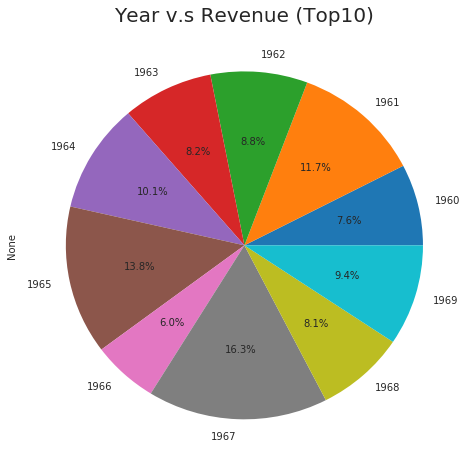

In [24]:
prop_revenue_year[:10].plot(kind="pie",figsize=(8,8),autopct='%1.1f%%') # Pie chart
plt.title("Year v.s Revenue (Top10)" , fontsize=20);

Based on the previous bar plot we notice clearly that the decades '60s and' 70s are dominated.
as we see **1977** has the most proportion of revenue based on the number of movies in the year in all time and also see **1966** is the worst.
between 1977 and the difference between them is about 3 times

It can also be seen **2001** has the most proportion of revenue in this century and has order #. 17

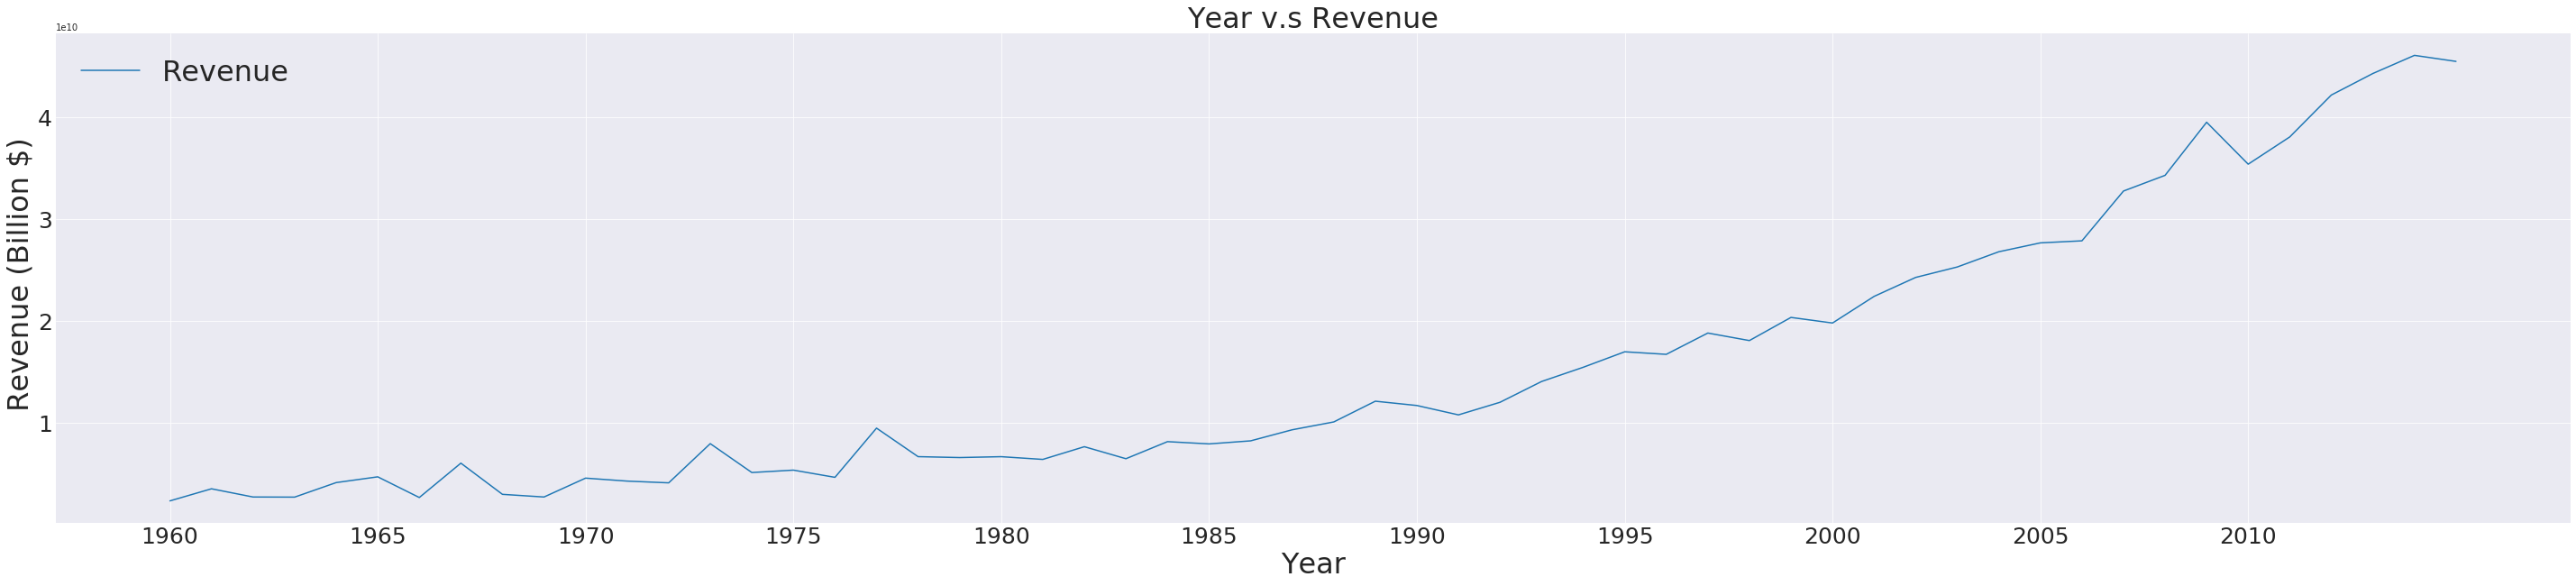

In [31]:
revenue_year.plot(kind="line",figsize=(50,10),fontsize=25,label="Revenue",xticks=np.arange(1960,2015,5)) # Bar chart
plt.title("Year v.s Revenue" , fontsize=32)
plt.xlabel("Year" , fontsize=32)
plt.ylabel(" Revenue (Billion $)" , fontsize=32)
plt.legend(fontsize=32);



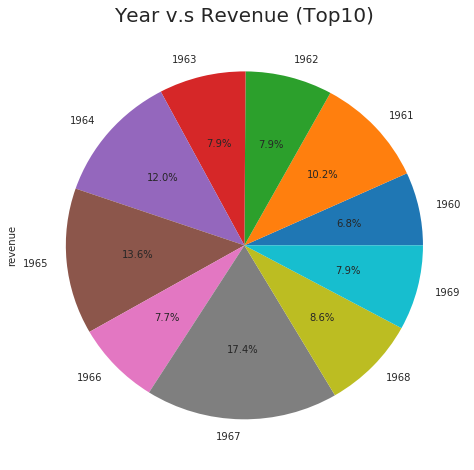

In [26]:
revenue_year[:10].plot(kind="pie",figsize=(8,8),autopct='%1.1f%%') # Pie chart
plt.title("Year v.s Revenue (Top10)" , fontsize=20);

Now, If we ignoring the proportion, we see **2014** has the most revenue in all time and also see **1960** is the worst.and wee see clearly that this century and especially the past decade is the best for revenues.

- There was exponential accelerating from mid of the 80s

#### The Answer : 
- A.***With*** proportion **1977** has the most revenue.
- B.***Without*** proportion **2014** has the most revenue.

### Question 2 :
>Does There is a relation between budget and revenue? and whats is the strength of it?

In this Question, I try to answer the question That says the more you spend, the more you earn? 


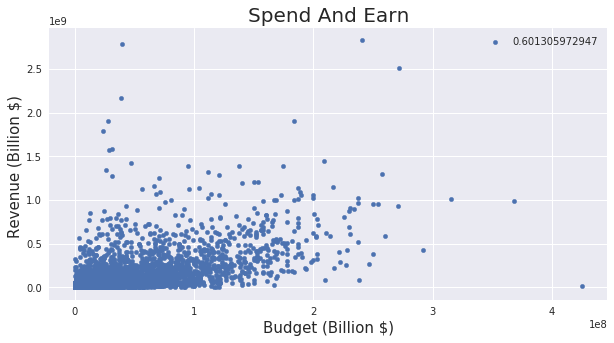

In [67]:
corr = df['revenue'].corr(df['budget']) #calculate the correlation between budget and revenue 
df.plot(kind="scatter",y="revenue" , x="budget",figsize=(10,5) , label = corr)
plt.title("Spend And Earn" , fontsize=20)
plt.xlabel("Budget (Billion $)" , fontsize=15)
plt.ylabel("Revenue (Billion $) " , fontsize=15)
plt.legend();

Based on the previous bar plot we notice that there is a moderated positive relation between the revenue and budget.
and the correlation is 0.601.

It can also be seen there are a lot of outliers.

#### The Answer : 
- ***There is*** a Relation between them and we can say the more you spend, the more you earn.

### Question 3 :
Did the inflation impact on relation between budget and revenue ? (inflation on question 2)

Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over some period of time. It is the rise in the general level of prices where a unit of currency effectively buys less than it did in prior periods. Often expressed as a percentage, inflation thus indicates a decrease in the purchasing power of a nation’s currency.(1)
Because of this problem I would like to ask the third question to show and analyze this global problem and its impact on budget and revenue. 

First Create Dataset start with 2010 (the beginning of this problem) to show the relation between budget and revenue. 

In [108]:
df_2010 = df[df['release_year']>=2010] # create new dataset from 2010
df_2010['release_year'].min() # check if the first year in dataset is 2010

2010

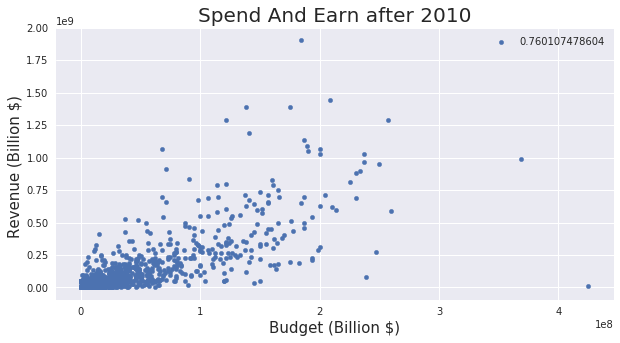

In [110]:
corr_2010 = df_2010['revenue'].corr(df_2010['budget']) #calculate the correlation between budget and revenue (2010) 
df_2010.plot(kind="scatter" ,y="revenue" , x="budget",figsize=(10,5),label = corr_2010 )
plt.title("Spend And Earn after 2010" , fontsize=20)
plt.xlabel("Budget (Billion $)" , fontsize=15)
plt.ylabel("Revenue (Billion $) " , fontsize=15)
plt.legend();

Based on the bar plot we notice that there is a **strong** positive relation between the revenue and budget after 2010 and the correlation is 0.760 unlike on the previous bar that record  moderated positive and the correlation is 0.601.
the differace between them reach about 0.16 % 
It can also be seen there are a lot of outliers as we see in the previous plot.

#### The Answer : 
- The Inflation has a huge impact on the relation to be strong Relation between them and we can emphasize on say the more you spend, the more you earn. especially after 2010.

<a id='conclusions'></a>
## Conclusions

>- ***Q1 :***  Which year do the movies get the most revenue ?<br>
    The Year that make the most ***With*** proportion revenue (revenue/nuber of movies per year) in all time is **1977**.and if we ignoring proportion revenue **2014**

>- ***Q2 :*** Does There is a relation between budget and revenue? and whats is the strength of it? <br>
    There is a **moderated positive relation** between the revenue and budget (if you spend more you will gain more).
    
>- ***Q3 :***  Did the inflation impact on relation between budget and revenue ? (inflation on question 2)<br>
    The Inflation has a huge impact on the relation to be strong Relation between them and we can emphasize on say the more you spend, the more you earn. especially after 2010. 
### Limitation 
- A lot of Movies without information about the cast or director
- A lot of Movies with 0 budget and 0 revenue

### Sources
(1) : https://www.investopedia.com/terms/i/inflation.asp

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0